## Задание 2: критерии согласия

Все критерии проверяем для выборок:
 $X_1 \sim N(5, 7), n = 400;\\ X_2 \sim X_1 + 0.1 * uniform([-6; 6]);\\ X_3 \sim X_1 + 0.01 * Cauchy(0, 1) $
 $k = 10$

Сделаем заготовки распределений, которые будем проверять:

In [ ]:
from utils.noise import get_with_noise
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

DISTR_NORMAL = np.random.normal(loc=5, scale=7 ** 0.5, size=400)
DISTR_NORMAL_UN = get_with_noise(DISTR_NORMAL, lambda: st.uniform.rvs(loc=-6, scale=12))
DISTR_NORMAL_CAUCHY = get_with_noise(DISTR_NORMAL, lambda: st.cauchy.rvs())

fig, (plt_n, plt_u, plt_c) = plt.subplots(1, 3)
plt_n.hist(DISTR_NORMAL, bins=25)
plt_n.set_title("normal")
plt_u.hist(DISTR_NORMAL_UN, bins=25)
plt_u.set_title("With uniform error")
plt_c.hist(DISTR_NORMAL_CAUCHY, bins=25)
plt_c.set_title("With caushy error")



### Пункт 1: Проверка критерия согласия Пирсона (нормальности, Хи-квадрат)

In [ ]:
from utils.group import group, get_mean, get_dispersion


# Функция, считающая теоретическую частоту для нормального распределения с заданными параметрами
def get_theoretical_frequency(a, b, mean, disp):
    return st.norm.cdf(b, loc=mean, scale=disp ** 0.5) - st.norm.cdf(a, loc=mean, scale=disp ** 0.5)


distr1 = DISTR_NORMAL_CAUCHY

#Превращаем выборку в группированную:
k = 10
distr1_gr = group(distr1, k)
mean_mark = get_mean(distr1_gr, distr1.size)
disp_mark = get_dispersion(distr1_gr, distr1.size)
print(f"Mean group mark: {mean_mark}")
print(f"Dispersion group mark: {disp_mark}")

# Считаем статистику критерия:
h_criteria = 0
for sect in distr1_gr:
    theor_freq = get_theoretical_frequency(sect.a, sect.b, mean_mark, disp_mark)
    h_criteria += (sect.rel_frequency - theor_freq) ** 2 / theor_freq
h_criteria *= distr1.size

# Проверим, подчиняется ли он распределению Хи-квадрат, чтобы выяснить верна ли гипотеза
# Вводим ошибку первого рода (вероятность отбросить правильную гипотезу):
alpha = 0.05
# Вычисляем доверительный интервал для распределения Хи-квадрат
df = len(distr1_gr) - 1
a = st.chi2.ppf(df=df, q=alpha / 2)
b = st.chi2.ppf(df=df, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {h_criteria}")

### Пункт 2: Критерий Колмагорова

Сначала зададим эмперическую функцию распределения:

In [ ]:
def emperic_distr_func(distr: [], x):
    count = 0
    for dot in distr:
        if dot <= x:
            count += 1
    return count / len(distr)

Теперь посчитаем критерий (статистику): $D_n = sup|F_n(x) - F(x)| \approx max|F_n(x_j) - F(x_j)|$

In [ ]:
distr1 = DISTR_NORMAL_CAUCHY
mean_mark = distr1.mean()
std_mark = distr1.std()

d_n = max([abs(emperic_distr_func(distr1, el) - st.norm.cdf(el, loc=mean_mark, scale=std_mark)) for el in distr1])
k = distr1.size ** 0.5 * d_n

alpha = 0.05
k_a = st.kstwobign.ppf(q=alpha)

print(f"{k} <? {k_a}")


### Пункт 3: Критерий Колмагорова-Смирнова (Разделить выборку на 2 половинки и проверить гипотезу о том, что они одинаково распределены)

In [ ]:
distr = DISTR_NORMAL
first_half = distr[:distr.size // 2]
second_half = distr[distr.size // 2:]
first_half.sort()
second_half.sort()
d_n1 = max([abs(emperic_distr_func(first_half, el) - emperic_distr_func(second_half, el)) for el in
            first_half])
d_n2 = max([abs(emperic_distr_func(first_half, el) - emperic_distr_func(second_half, el)) for el in
            second_half])

d_n = max(d_n1, d_n2)
k = (first_half.size * second_half.size / (first_half.size + second_half.size)) ** 0.5 * d_n

alpha = 0.05
k_a = st.kstwobign.ppf(q=1 - alpha)
print(f"{k} <? {k_a}")

Text(0.5, 1.0, 'With caushy error')

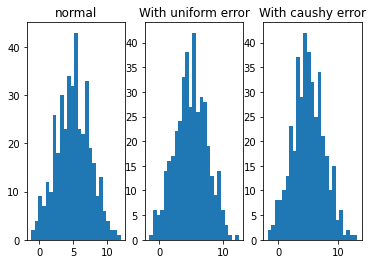

In [33]:
from utils.noise import get_with_noise
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

DISTR_NORMAL = np.random.normal(loc=5, scale=7 ** 0.5, size=400)
DISTR_NORMAL_UN = get_with_noise(DISTR_NORMAL, lambda: st.uniform.rvs(loc=-6, scale=12))
DISTR_NORMAL_CAUCHY = get_with_noise(DISTR_NORMAL, lambda: st.cauchy.rvs())

fig, (plt_n, plt_u, plt_c) = plt.subplots(1, 3)
plt_n.hist(DISTR_NORMAL, bins=25)
plt_n.set_title("normal")
plt_u.hist(DISTR_NORMAL_UN, bins=25)
plt_u.set_title("With uniform error")
plt_c.hist(DISTR_NORMAL_CAUCHY, bins=25)
plt_c.set_title("With caushy error")



### Пункт 1: Проверка критерия согласия Пирсона (нормальности, Хи-квадрат)

In [24]:
from utils.group import group, get_mean, get_dispersion


# Функция, считающая теоретическую частоту для нормального распределения с заданными параметрами
def get_theoretical_frequency(a, b, mean, disp):
    return st.norm.cdf(b, loc=mean, scale=disp ** 0.5) - st.norm.cdf(a, loc=mean, scale=disp ** 0.5)


distr1 = DISTR_NORMAL_CAUCHY

#Превращаем выборку в группированную:
k = 10
distr1_gr = group(distr1, k)
mean_mark = get_mean(distr1_gr, distr1.size)
disp_mark = get_dispersion(distr1_gr, distr1.size)
print(f"Mean group mark: {mean_mark}")
print(f"Dispersion group mark: {disp_mark}")

# Считаем статистику критерия:
h_criteria = 0
for sect in distr1_gr:
    theor_freq = get_theoretical_frequency(sect.a, sect.b, mean_mark, disp_mark)
    h_criteria += (sect.rel_frequency - theor_freq) ** 2 / theor_freq
h_criteria *= distr1.size

# Проверим, подчиняется ли он распределению Хи-квадрат, чтобы выяснить верна ли гипотеза
# Вводим ошибку первого рода (вероятность отбросить правильную гипотезу):
alpha = 0.05
# Вычисляем доверительный интервал для распределения Хи-квадрат
df = len(distr1_gr) - 1
a = st.chi2.ppf(df=df, q=alpha / 2)
b = st.chi2.ppf(df=df, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {h_criteria}")

Mean group mark: 4.819999999999999
Dispersion group mark: 8.2524
[2.7003894999803584; 19.02276779864163], H criteriy = 720.1572086765968


### Пункт 2: Критерий Колмагорова

Сначала зададим эмперическую функцию распределения:

In [22]:
def emperic_distr_func(distr: [], x):
    count = 0
    for dot in distr:
        if dot <= x:
            count += 1
    return count / len(distr)

Теперь посчитаем критерий (статистику): $D_n = sup|F_n(x) - F(x)| \approx max|F_n(x_j) - F(x_j)|$

In [25]:
distr1 = DISTR_NORMAL_CAUCHY
mean_mark = distr1.mean()
std_mark = distr1.std()

d_n = max([abs(emperic_distr_func(distr1, el) - st.norm.cdf(el, loc=mean_mark, scale=std_mark)) for el in distr1])
k = distr1.size ** 0.5 * d_n

alpha = 0.05
k_a = st.kstwobign.ppf(q=alpha)

print(f"{k} <? {k_a}")


0.9414569879225554 <? 0.5196103791686225


### Пункт 3: Критерий Колмагорова-Смирнова (Разделить выборку на 2 половинки и проверить гипотезу о том, что они одинаково распределены)

In [43]:
distr = DISTR_NORMAL
first_half = distr[:distr.size // 2]
second_half = distr[distr.size // 2:]
first_half.sort()
second_half.sort()
d_n1 = max([abs(emperic_distr_func(first_half, el) - emperic_distr_func(second_half, el)) for el in
            first_half])
d_n2 = max([abs(emperic_distr_func(first_half, el) - emperic_distr_func(second_half, el)) for el in
            second_half])

d_n = max(d_n1, d_n2)
k = (first_half.size * second_half.size / (first_half.size + second_half.size)) ** 0.5 * d_n

alpha = 0.05
k_a = st.kstwobign.ppf(q=1 - alpha)
print(f"{k} <? {k_a}")

0.7500000000000001 <? 1.3580986393225505


In [12]:
import numpy as np
import scipy.stats as st
from utils.group import group, get_mean, get_dispersion


# Функция, считающая теоретическую частоту для нормального распределения с заданными параметрами
def get_theoretical_frequency(a, b, mean, disp):
    return st.norm.cdf(b, loc=mean, scale=disp ** 0.5) - st.norm.cdf(a, loc=mean, scale=disp ** 0.5)


distr1 = np.random.normal(loc=5, scale=7 ** 0.5, size=400)

#Превращаем выборку в группированную:
k = 10
distr1_gr = group(distr1, k)
mean_mark = get_mean(distr1_gr, distr1.size)
disp_mark = get_dispersion(distr1_gr, distr1.size)
print(f"Mean group mark: {mean_mark}")
print(f"Dispersion group mark: {disp_mark}")

# Считаем статистику критерия:
h_criteria = 0
for sect in distr1_gr:
    theor_freq = get_theoretical_frequency(sect.a, sect.b, mean_mark, disp_mark)
    h_criteria += (sect.rel_frequency - theor_freq) ** 2 / theor_freq
h_criteria *= distr1.size

# Проверим, подчиняется ли он распределению Хи-квадрат, чтобы выяснить верна ли гипотеза
# Вводим ошибку первого рода (вероятность отбросить правильную гипотезу):
alpha = 0.05
# Вычисляем доверительный интервал для распределения Хи-квадрат
df = len(distr1_gr) - 1
a = st.chi2.ppf(df=df, q=alpha / 2)
b = st.chi2.ppf(df=df, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {h_criteria}")

Mean group mark: 5.269499999999998
Dispersion group mark: 6.532569749999998
[2.7003894999803584; 19.02276779864163], H criteriy = 7.122921372642721
